In [167]:
import pandas as pd

DIR = '../data/new data/'
# bitcoin_time_series = pd.read_csv("drive/MyDrive/File Skripsi/data_bitcoinity_full_daily.csv", parse_dates = ['Time'])
''' #bitcoinity data
bitcoin_time_series = pd.read_csv(DIR + "bitcoin_price_daily.csv", parse_dates = ['Time'])
gtrend_time_series = pd.read_csv(DIR + "daily_gtrend_data_new.csv", parse_dates = ['date'])
block_size = pd.read_csv(DIR + "block_size_cut.csv", parse_dates = ['Time'])
mining_difficulty = pd.read_csv(DIR + "mining_difficulty_daily_cut.csv", parse_dates = ['Time'])
number_of_transaction = pd.read_csv(DIR + "number_of_transaction_cut.csv", parse_dates = ['Time'])
'''

# cmc data
bitcoin_time_series = pd.read_csv(DIR + "cmc_plus_gold_fixed.csv", parse_dates = ['date'])
# gtrend_time_series = pd.read_csv(DIR + "daily_gtrend_data_cmc.csv", parse_dates = ['date'])

In [168]:
# gtrend_time_series = pd.read_csv("drive/MyDrive/File Skripsi/daily_gtrend_data.csv", parse_dates = ['date'])

In [169]:
# gtrend_time_series.tail()

In [170]:
dataset = bitcoin_time_series.copy()
# dataset['gtrend'] = gtrend_time_series['bitcoin']

In [171]:
dataset = dataset.drop(columns=['index'])
dataset = dataset.drop(columns=['gold_price'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3124 non-null   datetime64[ns]
 1   open       3124 non-null   float64       
 2   high       3124 non-null   float64       
 3   low        3124 non-null   float64       
 4   close      3124 non-null   float64       
 5   volume     3124 non-null   float64       
 6   marketcap  3124 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 171.0 KB


In [172]:
dataset.corr()

,open,high,low,close,volume,marketcap
open,1.000000,0.999524,0.999150,0.998871,0.764514,0.998673
high,0.999524,1.000000,0.999071,0.999520,0.767455,0.999259
low,0.999150,0.999071,1.000000,0.999415,0.757674,0.999299
close,0.998871,0.999520,0.999415,1.000000,0.763104,0.999795
volume,0.764514,0.767455,0.757674,0.763104,1.000000,0.762293
marketcap,0.998673,0.999259,0.999299,0.999795,0.762293,1.000000


In [173]:
print('price mean :', dataset['open'].mean())
# print('gtrend mean :', dataset['gtrend'].mean())
print('price stdv :', dataset['open'].std())
# print('gtrend stdv :', dataset['gtrend'].std())

price mean : 8457.026504481439
price stdv : 14015.065825230788


In [174]:
# del gtrend_time_series
del bitcoin_time_series

In [175]:
train_dates = dataset['date']
dataset.tail()

,date,open,high,low,close,volume,marketcap
3119,2021-11-11,64978.89,65579.01,64180.49,64949.96,3.588063e+10,1.225643e+12
3120,2021-11-12,64863.98,65460.81,62333.91,64155.94,3.608489e+10,1.210715e+12
3121,2021-11-13,64158.12,64915.67,63303.73,64469.53,3.047423e+10,1.216695e+12
3122,2021-11-14,64455.37,65495.18,63647.81,65466.84,2.512209e+10,1.235579e+12
3123,2021-11-15,65521.29,66281.57,63548.14,63557.87,3.055876e+10,1.199611e+12


In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, Dropout, GRU
# from recurrent_experimental import GRU

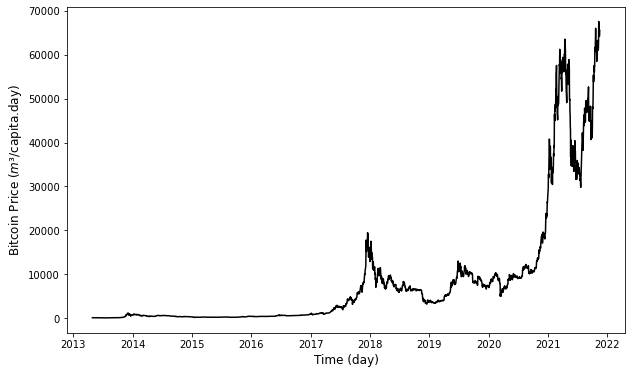

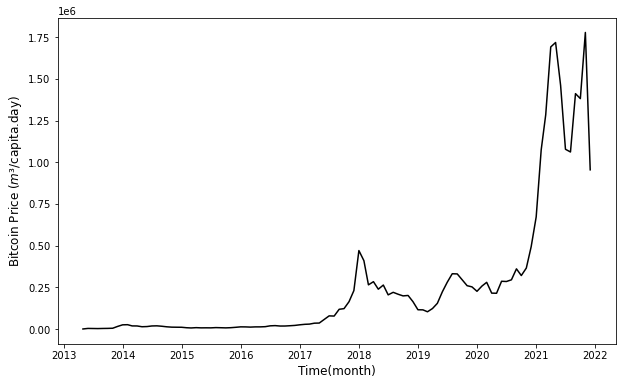

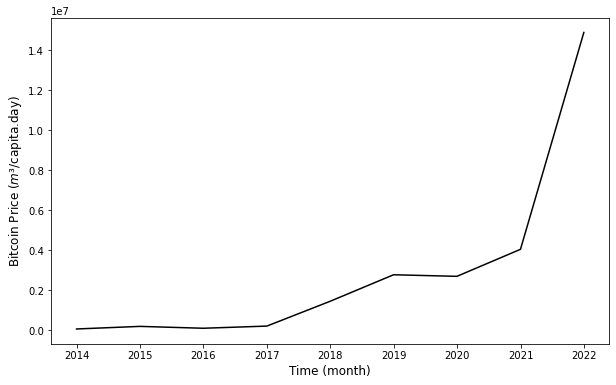

In [177]:
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12}) 
    plt.ylabel('Bitcoin Price ($m³$/capita.day)', 
                                  {'fontsize': 12})
dataset_to_plt = dataset.copy()
dataset_to_plt = dataset_to_plt.set_index('date')
timeseries(dataset_to_plt.index, dataset_to_plt['open'], 'Time (day)')
dataset_to_plt['month'] = dataset_to_plt.index.month
dataset_by_month = dataset_to_plt.resample('M').sum()
timeseries(dataset_by_month.index, dataset_by_month['open'], 
           'Time(month)')
dataset_to_plt['year'] = dataset_to_plt.index.year
dataset_by_year = dataset_to_plt.resample('Y').sum()
timeseries(dataset_by_year.index, dataset_by_year['open'], 
           'Time (month)')

In [178]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3124 non-null   datetime64[ns]
 1   open       3124 non-null   float64       
 2   high       3124 non-null   float64       
 3   low        3124 non-null   float64       
 4   close      3124 non-null   float64       
 5   volume     3124 non-null   float64       
 6   marketcap  3124 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 171.0 KB


In [179]:
# Check for missing values
print('Total num of missing values:') 
print(dataset.open.isna().sum())
print('')
# Locate the missing value
df_missing_date = dataset.loc[dataset.open.isna() == True]
print('The date of missing value:')
print(df_missing_date.loc[:,['date']])
# Replcase missing value with interpolation
dataset.open.interpolate(inplace = True)
# Keep WC and drop Date
dataset = dataset.drop('date', axis = 1)

Total num of missing values:
0

The date of missing value:
Empty DataFrame
Columns: [date]
Index: []


In [180]:
print(dataset.shape)

(3124, 6)


In [181]:
#Scaling with Min Max
scaler = MinMaxScaler().fit(dataset)
dataset_scaled = scaler.transform(dataset)


In [182]:
#EXPERIMENTAL
trainX = []
trainY = []

n_future = 1
n_past = 30

for i in range(n_past, len(dataset) - n_future +1):
    trainX.append(dataset_scaled[i - n_past:i, 0:dataset_scaled.shape[1]])
    trainY.append(dataset_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (3094, 30, 6).
trainY shape == (3094, 1).


In [183]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape=(trainX.shape[1], trainX.shape[2])))# model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(trainY.shape[1])) 
    #Compile model
    model.compile(optimizer='adam',loss='mse', metrics='mape')
    return model
model_gru = create_gru(64)

In [184]:
model_gru.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_20 (GRU)                 (None, 30, 64)            13824     
_________________________________________________________________
gru_21 (GRU)                 (None, 64)                24960     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 38,849
Trainable params: 38,849
Non-trainable params: 0
_________________________________________________________________


In [185]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='checkpoint_model',
                                                 save_weights_only=True,
                                                 verbose=1)
    history = model.fit(trainX, trainY, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, verbose = 1, 
                        callbacks = [early_stop, cp_callback])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
155/155 [==============================] - 19s 61ms/step - loss: 1.3847e-04 - mape: 673.7258 - val_loss: 5.9909e-04 - val_mape: 3.4583

Epoch 00001: saving model to checkpoint_model
Epoch 2/100
155/155 [==============================] - 9s 54ms/step - loss: 5.3771e-05 - mape: 1932.2971 - val_loss: 2.8387e-04 - val_mape: 3.0657

Epoch 00002: saving model to checkpoint_model
Epoch 3/100
155/155 [==============================] - 8s 54ms/step - loss: 5.3246e-05 - mape: 1086.4675 - val_loss: 0.0012 - val_mape: 6.9921

Epoch 00003: saving model to checkpoint_model
Epoch 4/100
155/155 [==============================] - 8s 52ms/step - loss: 4.1314e-05 - mape: 2116.8721 - val_loss: 9.8713e-04 - val_mape: 5.4151

Epoch 00004: saving model to checkpoint_model
Epoch 5/100
155/155 [==============================] - 12s 76ms/step - loss: 3.2161e-05 - mape: 576.7736 - val_loss: 2.0521e-04 - val_mape: 2.0172

Epoch 00005: saving model to checkpoint_model
Epoch 6/100
155/155 [=============

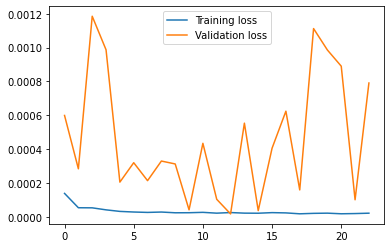

In [186]:
plt.plot(history_gru.history['loss'], label='Training loss')
plt.plot(history_gru.history['val_loss'], label='Validation loss')
plt.legend()
loss_history = pd.DataFrame({'loss': history_gru.history['loss'], 'val_loss':history_gru.history['val_loss'] })
loss_history.to_csv('loss_history_GRU_H.csv')

In [187]:
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape=(trainX.shape[1], trainX.shape[2])))# model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(trainY.shape[1])) 
    #Compile model
    model.compile(optimizer='sgd',loss='mse', metrics='mape')
    return model
model_gru_sgd = create_gru(64)

In [188]:
model_gru_sgd.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_22 (GRU)                 (None, 30, 64)            13824     
_________________________________________________________________
gru_23 (GRU)                 (None, 64)                24960     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 38,849
Trainable params: 38,849
Non-trainable params: 0
_________________________________________________________________


In [189]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='checkpoint_model',
                                                 save_weights_only=True,
                                                 verbose=1)
    history = model.fit(trainX, trainY, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, verbose = 1, 
                        callbacks = [early_stop, cp_callback])
    return history
history_gru_sgd = fit_model(model_gru_sgd)

Epoch 1/100
155/155 [==============================] - 16s 58ms/step - loss: 0.0027 - mape: 16115.8477 - val_loss: 0.1584 - val_mape: 66.2829

Epoch 00001: saving model to checkpoint_model
Epoch 2/100
155/155 [==============================] - 7s 48ms/step - loss: 0.0020 - mape: 15453.8164 - val_loss: 0.1206 - val_mape: 55.4625

Epoch 00002: saving model to checkpoint_model
Epoch 3/100
155/155 [==============================] - 10s 66ms/step - loss: 0.0016 - mape: 14690.2314 - val_loss: 0.0985 - val_mape: 51.4560

Epoch 00003: saving model to checkpoint_model
Epoch 4/100
155/155 [==============================] - 9s 56ms/step - loss: 0.0013 - mape: 13950.5215 - val_loss: 0.0778 - val_mape: 45.5339

Epoch 00004: saving model to checkpoint_model
Epoch 5/100
155/155 [==============================] - 8s 48ms/step - loss: 0.0010 - mape: 11462.3418 - val_loss: 0.0606 - val_mape: 39.3626

Epoch 00005: saving model to checkpoint_model
Epoch 6/100
155/155 [==============================] - 7s 

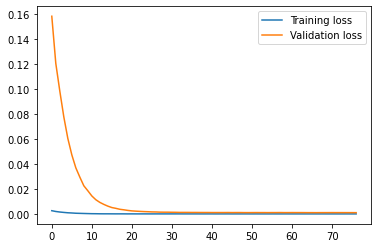

In [190]:
plt.plot(history_gru_sgd.history['loss'], label='Training loss')
plt.plot(history_gru_sgd.history['val_loss'], label='Validation loss')
plt.legend()
loss_history = pd.DataFrame({'loss': history_gru_sgd.history['loss'], 'val_loss':history_gru_sgd.history['val_loss'] })
loss_history.to_csv('loss_history_GRU_sgd_H.csv')

In [191]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [192]:
n_past = 16
n_days_for_prediction=30  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model_gru.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

[Timestamp('2021-11-01 00:00:00', freq='C'), Timestamp('2021-11-02 00:00:00', freq='C'), Timestamp('2021-11-03 00:00:00', freq='C'), Timestamp('2021-11-04 00:00:00', freq='C'), Timestamp('2021-11-05 00:00:00', freq='C'), Timestamp('2021-11-08 00:00:00', freq='C'), Timestamp('2021-11-09 00:00:00', freq='C'), Timestamp('2021-11-10 00:00:00', freq='C'), Timestamp('2021-11-12 00:00:00', freq='C'), Timestamp('2021-11-15 00:00:00', freq='C'), Timestamp('2021-11-16 00:00:00', freq='C'), Timestamp('2021-11-17 00:00:00', freq='C'), Timestamp('2021-11-18 00:00:00', freq='C'), Timestamp('2021-11-19 00:00:00', freq='C'), Timestamp('2021-11-22 00:00:00', freq='C'), Timestamp('2021-11-23 00:00:00', freq='C'), Timestamp('2021-11-24 00:00:00', freq='C'), Timestamp('2021-11-26 00:00:00', freq='C'), Timestamp('2021-11-29 00:00:00', freq='C'), Timestamp('2021-11-30 00:00:00', freq='C'), Timestamp('2021-12-01 00:00:00', freq='C'), Timestamp('2021-12-02 00:00:00', freq='C'), Timestamp('2021-12-03 00:00:00'

In [193]:
prediction_copies = np.repeat(prediction, dataset_scaled.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [194]:
import seaborn as sns

In [195]:
df = pd.read_csv(DIR + "cmc_plus_gold_fixed.csv", parse_dates = ['date'])


<AxesSubplot:xlabel='date', ylabel='open'>

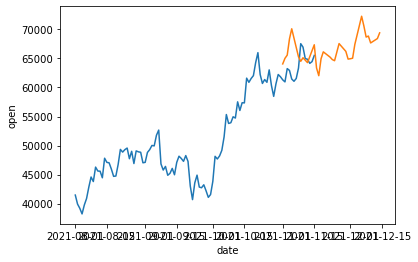

In [196]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['date', 'open']]
original['date']=pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2021-8-1']

sns.lineplot(original['date'], original['open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])

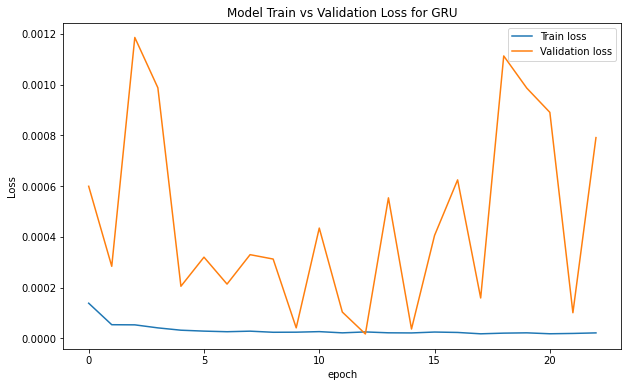

In [197]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

In [198]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       3124 non-null   float64
 1   high       3124 non-null   float64
 2   low        3124 non-null   float64
 3   close      3124 non-null   float64
 4   volume     3124 non-null   float64
 5   marketcap  3124 non-null   float64
dtypes: float64(6)
memory usage: 146.6 KB


In [199]:
#saving model in h5 format
model_gru.save('gru_with_history.h5')